# Forecasting Time Series Data with SARIMAX + SARIMA Hyperparameter Tuning

Time series forecasting plays a critical role in various fields such as finance, economics, weather forecasting, and more. One powerful tool in the time series forecasting toolbox is SARIMAX, which stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors. In this article, we will guide you through the process of applying SARIMAX to forecast time series data.

**Step 1: Understand the Data**

Before diving into modeling, it's crucial to familiarize yourself with the time series data you're working with. This involves understanding any existing patterns, trends, and potential seasonality in the data.

**Step 2: Install Necessary Libraries**

Ensure you have the required Python libraries installed. These typically include `pandas` for data manipulation, `statsmodels` for time series analysis, and `matplotlib` for plotting.

In [ ]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
import yfinance as yf # Yahoo Finance for retrieving financial data
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components

**Step 3: Load and Preprocess Data**

Load the time series data into a suitable data structure, such as a pandas DataFrame or a numpy array. Check for missing values and outliers, and handle them appropriately, either by imputing missing values or removing outliers.

In [ ]:
# Define the stock ticker symbol
ticker = 'AMD'
# Download the data
df = yf.download(ticker, start='2022-06-24', end='2023-06-24') # Download data from Yahoo Finance
# Print the first few rows of the data
print(df.head()) # Display the first few rows of the downloaded data

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2022-06-24  83.559998  87.529999  83.080002  87.080002  87.080002   88553900
2022-06-27  87.360001  88.220001  85.250000  86.160004  86.160004   74663500
2022-06-28  85.709999  86.730003  80.430000  80.779999  80.779999   95618600
2022-06-29  79.550003  79.750000  76.510002  77.989998  77.989998  104140900
2022-06-30  77.730003  78.910004  75.480003  76.470001  76.470001  105368600


**Data Preprocessing and Column Selection**

In [ ]:
# Add a 'Date' column based on the index
df["Date"] = df.index
# Reset the index and drop the old index column
df.reset_index(drop=True, inplace=True)
# Keep only the 'Date' and 'Close' columns
df = df[['Date', 'Close']]

**Step 4: Visualize the Data**

Plotting the time series data provides a visual understanding of its characteristics. This can help in identifying trends, seasonality, and any unusual patterns.

In [ ]:
# Create the line plot
fig1 = px.line(df, x='Date', y='Close')
# Set the title using the ticker value
fig1.update_layout(title=f"Stock Price for {ticker}")
# Display the plot
fig1.show()

**Step 5: Stationarity**

Stationarity is a crucial concept in time series forecasting. It refers to a property of a time series where the statistical properties (such as mean, variance, and autocovariance) remain constant over time. In other words, a stationary time series does not exhibit trends or seasonality in its behavior.
Here are several reasons why stationarity is important in time series forecasting:
1. Statistical Validity:
 - Many time series models, including ARIMA and SARIMAX, assume stationarity. If the data is not stationary, the results from these models may not be reliable or interpretable.
2. Model Assumptions:
 - Stationarity is a key assumption for various time series models. When the data is non-stationary, it may violate these assumptions and lead to inaccurate forecasts.
3. Mean and Variance Stability:
 - In a stationary time series, the mean and variance are constant over time. This makes it easier to understand and interpret the data, as there are no major shifts or fluctuations in these properties.
4. Forecasting Accuracy:
 - Stationary data often leads to more accurate and reliable forecasts. Models trained on stationary data can better capture the underlying patterns and relationships, leading to more accurate predictions.
5. Removal of Trends and Seasonality:
 - Non-stationary data often contains trends or seasonal patterns. By making the data stationary through techniques like differencing or detrending, we can isolate the underlying patterns from the trend or seasonality.
6. Easier Interpretation:
 - Stationary time series are easier to interpret and analyze. Patterns, relationships, and anomalies are more apparent when the data exhibits stationarity.
7. Time-Invariance:
 - Stationarity implies that the time series is time-invariant. This means that the behavior of the series is consistent regardless of when the observations were made.
8. Model Stability:
 - Stationary time series are typically more stable over time. This means that the behavior of the time series is less likely to change dramatically in the future.
9. Mean Reversion:
 - In finance and economics, stationarity is often associated with mean reversion, where a series tends to revert back to its mean over time. This can have important implications for investment strategies.
In summary, ensuring stationarity in a time series is a critical step in preparing the data for accurate forecasting. It helps to meet the assumptions of many forecasting models, leads to more reliable predictions, and facilitates a better understanding of the underlying patterns in the data.

**Decomposing time series data**

Decomposing time series data into its constituent components (trend, seasonality, and residuals) is a crucial step in understanding and modeling time-dependent patterns. This decomposition helps identify underlying patterns and enables more accurate forecasting. Here's a detailed explanation of each component:
**Trend Component**

The trend component represents the long-term progression or direction of the data. It captures the overall pattern that is not attributable to seasonal or cyclical fluctuations. Trends can be increasing (upward), decreasing (downward), or stable (horizontal).

Methods for Identifying Trends:

- Moving Averages: Calculating the average of a fixed-size window of data points to smooth out short-term fluctuations and highlight the overall trend.
- Exponential Smoothing: Assigning exponentially decreasing weights to past observations, giving more importance to recent data.
- Regression Analysis: Fitting a regression model to the time series data to estimate the trend component.
Seasonality Component
The seasonality component captures patterns that repeat at regular intervals, typically within a year. For example, retail sales often exhibit higher numbers during holiday seasons. Seasonality can be additive (constant amplitude) or multiplicative (varying amplitude).
Methods for Identifying Seasonality:
- Seasonal Decomposition of Time Series (STL): This method decomposes time series data into trend, seasonal, and residual components using a seasonal-trend decomposition procedure based on loess.
- Periodogram Analysis: Examining the frequency domain of the data to identify dominant seasonal frequencies.
Residual Component
The residual component, also known as the error or noise, represents the random, unexplained variation in the data after accounting for the trend and seasonality. It contains any irregularities, noise, or unexpected events that cannot be attributed to the trend or seasonal patterns.
Methods for Identifying Residuals:
- Residuals are typically obtained by subtracting the estimated trend and seasonality components from the original time series data.
Decomposition Process
The process of decomposing a time series involves separating the observed data (Xt) into its constituent components:
The resulting trend, seasonality, and residuals are then used to model and forecast future values.
 Importance of Decomposition
- Improved Understanding: Decomposition provides insight into the underlying patterns and dynamics of the time series data.
- Enhanced Forecasting: Analyzing and modeling individual components allows for more accurate and interpretable forecasts.
- Anomaly Detection: Residuals can help identify unusual or unexpected events in the data.
By decomposing time series data, analysts can gain a deeper understanding of the patterns within the data, allowing for more informed decision-making and better forecasting capabilities. This process is a fundamental step in time series analysis.

# Additive and Multiplicative Seasonality
Additive and multiplicative seasonality are two different ways in which seasonal patterns can be expressed in a time series. Understanding the nature of seasonality (whether additive or multiplicative) is crucial for accurate modeling and forecasting.

**Additive Seasonality**

In an additive seasonal pattern, the seasonal component is added to the trend and error terms. Mathematically, it can be represented as:
Characteristics:
 - The seasonal fluctuations have a constant amplitude (the same amount of fluctuation occurs regardless of the level of the time series).
 - The impact of seasonality is consistent over time.

 - For example, if you're looking at monthly ice cream sales, an additive seasonal pattern would imply a consistent increase in sales during summer months, regardless of the overall level of sales.

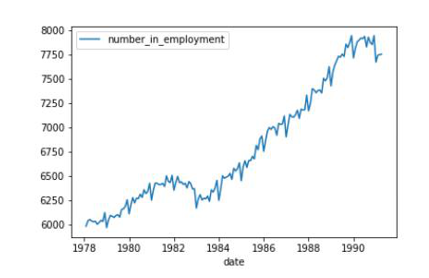

# Multiplicative Seasonality

In a multiplicative seasonal pattern, the seasonal component is multiplied with the trend and error terms. Mathematically, it can be represented as:
- Characteristics:
 - The seasonal fluctuations are proportional to the level of the time series. As the level of the time series increases, so does the seasonal effect.
 - The impact of seasonality grows with the level of the time series.

 - Using the ice cream sales example, if there's multiplicative seasonality, it would mean that during high sales months, the increase in sales is proportionally larger compared to lower sales months.

Example
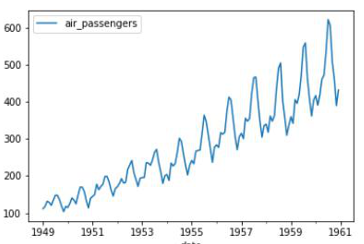


**Determining Seasonality Type**
Deciding whether seasonality is additive or multiplicative depends on analyzing the data and visual inspection. It can also be determined through statistical methods and model diagnostics.

It's worth noting that incorrectly identifying the type of seasonality can lead to inaccurate forecasts. Therefore, a careful examination of the data and consideration of the underlying mechanisms driving the seasonality are crucial steps in the time series analysis process.

Understanding whether seasonality is additive or multiplicative helps in selecting appropriate models, as different models are better suited for handling different types of seasonality.

**Transformation from Multiplicative to Additive**

Multiplicative time series data can often be transformed into additive time series through methods like taking logarithms. This transformation can be advantageous in specific situations. When a seasonal time series exhibits multiplicative seasonality, it can be advantageous to convert it into an additive series by applying a logarithmic transformation. This transformation changes the multiplicative elements into additive components, resulting in stabilized variance. This logarithmic transformation is particularly valuable when the seasonal component's amplitude is proportionate to the level of the series, resulting in a varying seasonal amplitude. The transformation effectively stabilizes the fluctuation in seasonal amplitude, facilitating more straightforward forecasting.

# Augmented Dickey-Fuller (ADF)

The Augmented Dickey-Fuller (ADF) test is a statistical hypothesis test used to determine whether a unit root is present in a univariate time series dataset. In simpler terms, it helps us assess whether a time series is stationary or non-stationary.

**Purpose of the ADF Test**

The presence of a unit root in a time series indicates non-stationarity. Non-stationary data can exhibit trends, which can lead to inaccurate forecasts when using models that assume stationarity. The ADF test is employed to assess whether differencing the data (to achieve stationarity) is necessary before applying certain time series models.

**How the ADF Test Works**

1. Null Hypothesis : The null hypothesis of the ADF test is that the time series has a unit root, indicating it is non-stationary.
2. Alternative Hypothesis: The alternative hypothesis is that the time series is stationary (i.e., it does not have a unit root).
3. Test Statistic: The ADF test statistic is computed. This statistic is used to compare against critical values to determine the likelihood of rejecting the null hypothesis.
4. Critical Values: The ADF test provides critical values at various confidence levels. These critical values depend on the sample size and the chosen significance level.
5. Decision: Based on the test statistic and critical values, you can decide whether to reject or fail to reject the null hypothesis.

**Interpretation**

Rejecting the Null Hypothesis: If the test statistic is less than the critical value, you reject the null hypothesis. This suggests that the time series is stationary, and differencing may not be necessary.

Failing to Reject the Null Hypothesis: If the test statistic is greater than the critical value, you fail to reject the null hypothesis. This implies that the time series may be non-stationary and differencing could be beneficial.

In [ ]:

def perform_adf_test(data):
    # Perform ADF test
    result = adfuller(data)

    # Print the results
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Check if the data is stationary based on the p-value
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary, Data can be processed further")

# Example Usage
perform_adf_test(df['Close'])


ADF Statistic: -2.013213174219679
p-value: 0.28080980278926104
Critical Values: {'1%': -3.4577787098622674, '5%': -2.873608704758507, '10%': -2.573201765981991}
The data is not stationary


# Step 6: Differencing (if needed)
If the data is not stationary, apply differencing to make it stationary. This process involves subtracting the previous value from the current value.

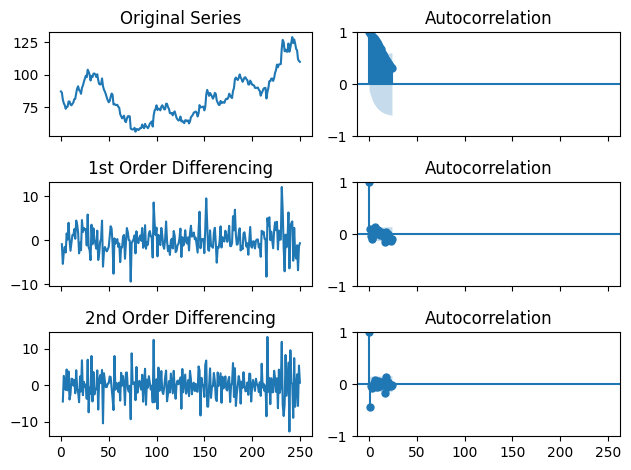

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_differencing_acf_pacf(data):
    fig, axes = plt.subplots(3, 2, sharex=True)

    # Original Series
    axes[0, 0].plot(data)
    axes[0, 0].set_title('Original Series')
    plot_acf(data, ax=axes[0, 1])

    # 1st Differencing
    diff_1 = data.diff().dropna()
    axes[1, 0].plot(diff_1)
    axes[1, 0].set_title('1st Order Differencing')
    plot_acf(diff_1, ax=axes[1, 1])

    # 2nd Differencing
    diff_2 = data.diff().diff().dropna()
    axes[2, 0].plot(diff_2)
    axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(diff_2, ax=axes[2, 1])

    plt.tight_layout()
    plt.show()

# Example Usage
plot_differencing_acf_pacf(df['Close'])

# Step 7: Identify Seasonality and Autocorrelations
Utilize autocorrelation and partial autocorrelation plots to identify the order of autoregressive (AR) and moving average (MA) components, as well as the seasonal order.

           0
0   1.000000
1   0.980285
2   0.957557
3   0.935598
4   0.914009
5   0.893179
6   0.868831
7   0.839151
8   0.808492
9   0.774980
10  0.740682
11  0.707750
12  0.676324
13  0.641283
14  0.607955
15  0.574249
16  0.539390
17  0.506053
18  0.474119
19  0.440244
20  0.409584
21  0.383322
22  0.358802
23  0.337378


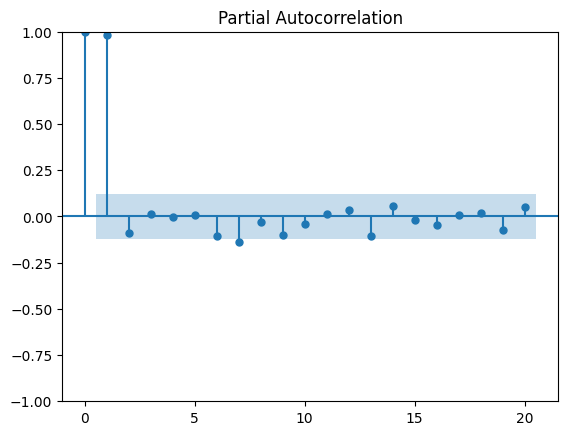

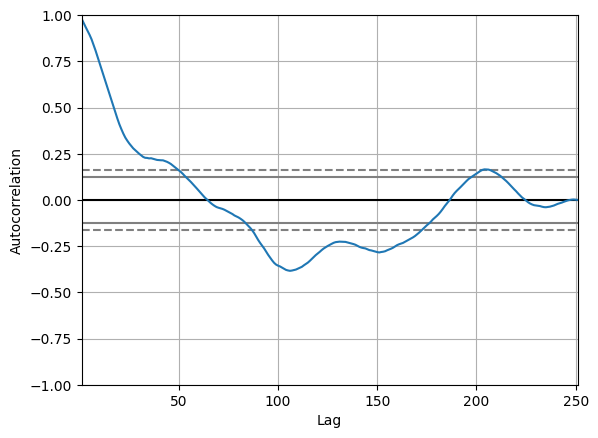

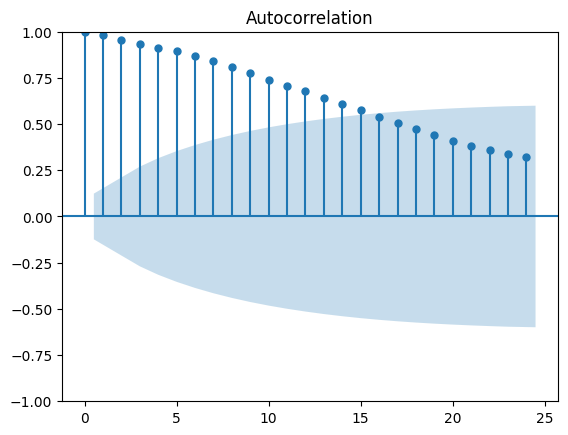

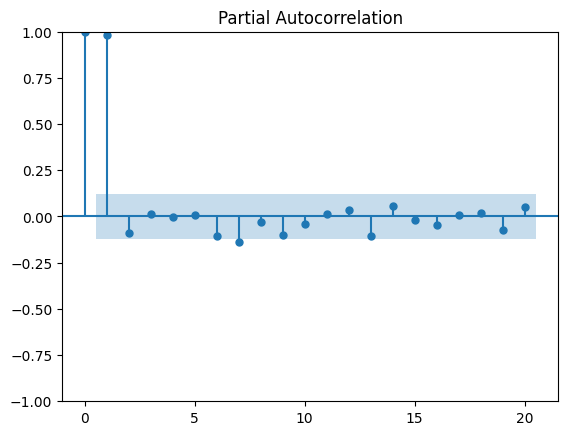

In [ ]:
# Import necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

# Visualize autocorrelation using pandas
pd.plotting.autocorrelation_plot(df['Close'])  # Plot autocorrelation using pandas

# Visualize autocorrelation using plot_acf
plot_acf(df['Close'], alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval

# Compute autocorrelation function (ACF) values
x_acf = pd.DataFrame(acf(df['Close']))  # Calculate autocorrelation function (ACF) values

# Print ACF values
print(x_acf)  # Print the ACF values

# Generate a partial autocorrelation plot
plot_pacf(df['Close'], lags=20, alpha=0.05)

# Step 8: Fit the SARIMAX Model
Based on the insights from step 7, select the appropriate orders for the AR, I (differencing), MA, seasonal AR, seasonal I, and seasonal MA components.
for example our values are
q = 2
d = 2
p = 1

In [ ]:
q = 2
d = 2
p = 1

# **SARIMAX**

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model_sarimax =auto_arima(df['Close'],start_p=0,d=1,start_q=0,
          max_p=1,max_d=2,max_q=2, start_P=0,
          D=1, start_Q=2, max_P=2,max_D=1,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1328.314, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1280.778, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1327.712, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1240.871, Time=0.58 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1215.670, Time=2.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1214.822, Time=2.38 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=2.44 sec
 ARIMA(1,1,0)(2,1,3)[12]             : AIC=inf, Time=12.11 sec
 ARIMA(1,1,0)(1,1,3)[12]             : AIC=1214.779, Time=3.38 sec
 ARIMA(1,1,0)(0,1,3)[12]             : AIC=1214.716, Time=2.04 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=2.02 sec
 ARIMA(1,1,0)(0,1,4)[12]             : AIC=1216.

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  251
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -601.227
Date:                                    Tue, 07 Nov 2023   AIC                           1214.453
Time:                                            13:41:31   BIC                           1235.287
Sample:                                                 0   HQIC                          1222.850
                                                    - 251                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1142      0.061      1.878      0

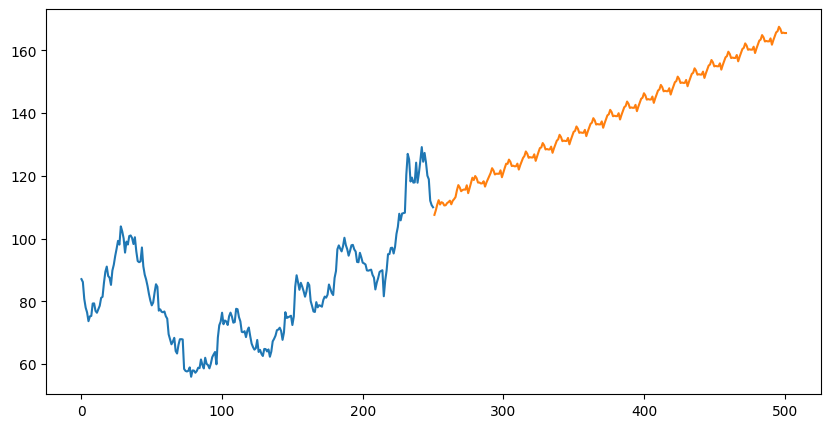

In [ ]:
print(model_sarimax.summary())
# predict next 30 days
forecast = model_sarimax.predict(len(df["Close"]), len(df['Close'])+30)
print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

SARIMAX using Statsmodel

In [ ]:
import statsmodels.api as sm
import warnings

p, d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'],
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -600.589
Date:                            Tue, 07 Nov 2023   AIC                           1219.177
Time:                                    13:47:52   BIC                           1250.428
Sample:                                         0   HQIC                          1231.772
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4826      0.103     14.451      0.000       1.282       1.684
ar.L2         -0.9195      0.089   

251    106.342095
252    108.990280
253    111.292078
254    113.456288
255    114.363421
256    115.542002
257    114.213088
258    112.174290
259    113.304572
260    112.585059
261    112.572702
262    113.051447
263    109.365605
264    112.261605
265    114.586721
266    116.807268
267    118.165806
268    119.315343
269    117.912382
270    115.851244
271    117.207688
272    116.693073
273    116.711063
274    117.323382
275    113.276801
276    116.474547
277    118.917424
278    121.324298
279    122.814593
280    124.029864
281    122.435882
Name: predicted_mean, dtype: float64


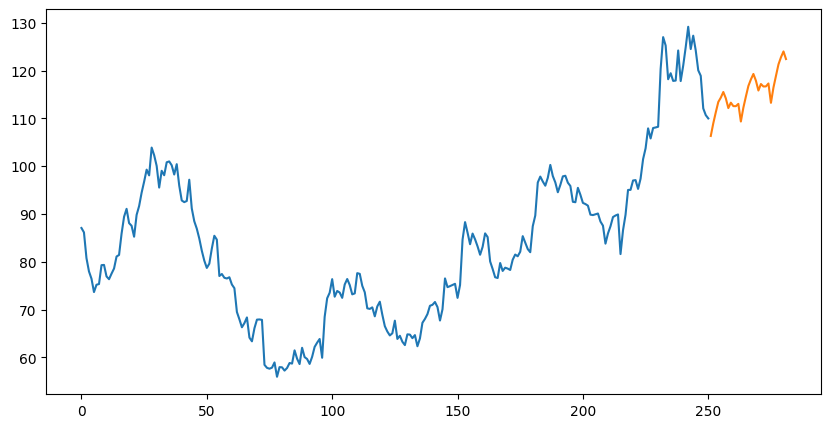

In [ ]:
# predict next 30 days BN
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

# SARIMA Hyperparameter Tuning
SARIMA (Seasonal AutoRegressive Integrated Moving Average) hyperparameter tuning involves the process of selecting the optimal values for the parameters of the SARIMA model in order to improve its forecasting accuracy. The hyperparameters in a SARIMA model include:


p (AR Order): The number of lag observations included in the model (AutoRegressive term).

d (Differencing Order): The number of times the data needs to be differenced to achieve stationarity.

q (MA Order): The size of the moving average window (Moving Average term).

P (Seasonal AR Order): The seasonal autoregressive order.

D (Seasonal Differencing Order): The number of seasonal differences.

Q (Seasonal MA Order): The seasonal moving average order.

s (Seasonal Period): The number of time units in a seasonal cycle.

Hyperparameter tuning involves finding the combination of these parameters that minimizes a chosen evaluation metric (such as Mean Absolute Error, Mean Squared Error, etc.) on a validation dataset. This process is crucial for improving the accuracy of the SARIMA model.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm
import warnings

# Define the p, d, q parameters to take any value between
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(df['Close'],
                                                  order=param,
                                                  seasonal_order=param_seasonal,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)
            results = temp_model.fit()
            print(f"SARIMA{param}{param_seasonal} - AIC: {results.aic}")
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print(f"Best SARIMA model - AIC: {best_pdq}, {best_seasonal_pdq}, {best_aic}")



SARIMA(0, 0, 0)(0, 0, 0, 12) - AIC: 2933.606783482486
SARIMA(0, 0, 0)(0, 0, 1, 12) - AIC: 2521.51081015389
SARIMA(0, 0, 0)(0, 0, 2, 12) - AIC: 2192.7449171077005
SARIMA(0, 0, 0)(0, 1, 0, 12) - AIC: 1814.2676132829092
SARIMA(0, 0, 0)(0, 1, 1, 12) - AIC: 1701.1750645358497
SARIMA(0, 0, 0)(0, 1, 2, 12) - AIC: 1600.0280415071468
SARIMA(0, 0, 0)(0, 2, 0, 12) - AIC: 1830.3018096808125
SARIMA(0, 0, 0)(0, 2, 1, 12) - AIC: 1666.3681520080168
SARIMA(0, 0, 0)(0, 2, 2, 12) - AIC: 1532.5873805062627
SARIMA(0, 0, 0)(1, 0, 0, 12) - AIC: 1817.1876688058792
SARIMA(0, 0, 0)(1, 0, 1, 12) - AIC: 1794.5007992416
SARIMA(0, 0, 0)(1, 0, 2, 12) - AIC: 1694.7482483569452
SARIMA(0, 0, 0)(1, 1, 0, 12) - AIC: 1724.2921969159556
SARIMA(0, 0, 0)(1, 1, 1, 12) - AIC: 1707.2610540400096
SARIMA(0, 0, 0)(1, 1, 2, 12) - AIC: 1601.4973489340196
SARIMA(0, 0, 0)(1, 2, 0, 12) - AIC: 1735.8045239527
SARIMA(0, 0, 0)(1, 2, 1, 12) - AIC: 1664.1931059076865
SARIMA(0, 0, 0)(1, 2, 2, 12) - AIC: 1534.569160596503
SARIMA(0, 0, 0)(2, 0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 0, 1)(1, 0, 2, 12) - AIC: 1504.7698795401118
SARIMA(0, 0, 1)(1, 1, 0, 12) - AIC: 1510.1339768896778
SARIMA(0, 0, 1)(1, 1, 1, 12) - AIC: 1495.291202929871
SARIMA(0, 0, 1)(1, 1, 2, 12) - AIC: 1403.546710867597
SARIMA(0, 0, 1)(1, 2, 0, 12) - AIC: 1545.0455002725203
SARIMA(0, 0, 1)(1, 2, 1, 12) - AIC: 1455.5997777824196
SARIMA(0, 0, 1)(1, 2, 2, 12) - AIC: 1349.2954178480554
SARIMA(0, 0, 1)(2, 0, 0, 12) - AIC: 1511.7841767689597
SARIMA(0, 0, 1)(2, 0, 1, 12) - AIC: 1513.8948453782655


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 0, 1)(2, 0, 2, 12) - AIC: 1487.2005482701595
SARIMA(0, 0, 1)(2, 1, 0, 12) - AIC: 1406.4454792281413
SARIMA(0, 0, 1)(2, 1, 1, 12) - AIC: 1406.9212528918436
SARIMA(0, 0, 1)(2, 1, 2, 12) - AIC: 1395.940627766261
SARIMA(0, 0, 1)(2, 2, 0, 12) - AIC: 1388.406264485038
SARIMA(0, 0, 1)(2, 2, 1, 12) - AIC: 1346.5048225950534
SARIMA(0, 0, 1)(2, 2, 2, 12) - AIC: 1354.2987292199916
SARIMA(0, 0, 2)(0, 0, 0, 12) - AIC: 2356.368129141507
SARIMA(0, 0, 2)(0, 0, 1, 12) - AIC: 1943.4376066755099
SARIMA(0, 0, 2)(0, 0, 2, 12) - AIC: 1755.2964124579848
SARIMA(0, 0, 2)(0, 1, 0, 12) - AIC: 1458.1886793037372
SARIMA(0, 0, 2)(0, 1, 1, 12) - AIC: 1381.8692466831221
SARIMA(0, 0, 2)(0, 1, 2, 12) - AIC: 1298.106271357512
SARIMA(0, 0, 2)(0, 2, 0, 12) - AIC: 1531.2373858869787
SARIMA(0, 0, 2)(0, 2, 1, 12) - AIC: 1347.976164420937
SARIMA(0, 0, 2)(0, 2, 2, 12) - AIC: 1253.8869004140624
SARIMA(0, 0, 2)(1, 0, 0, 12) - AIC: 1477.060835980769
SARIMA(0, 0, 2)(1, 0, 1, 12) - AIC: 1459.804732673664
SARIMA(0, 0, 2)(1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 0, 2)(2, 0, 1, 12) - AIC: 1409.057525860952


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 0, 2)(2, 0, 2, 12) - AIC: 1401.3975095551875
SARIMA(0, 0, 2)(2, 1, 0, 12) - AIC: 1307.6617890391149
SARIMA(0, 0, 2)(2, 1, 1, 12) - AIC: 1308.7708149523505
SARIMA(0, 0, 2)(2, 1, 2, 12) - AIC: 1293.002863978336
SARIMA(0, 0, 2)(2, 2, 0, 12) - AIC: 1306.4174086338487
SARIMA(0, 0, 2)(2, 2, 1, 12) - AIC: 1261.6640654231835
SARIMA(0, 0, 2)(2, 2, 2, 12) - AIC: 1232.979680456461
SARIMA(0, 1, 0)(0, 0, 0, 12) - AIC: 1232.8402196234074
SARIMA(0, 1, 0)(0, 0, 1, 12) - AIC: 1177.3521677023632
SARIMA(0, 1, 0)(0, 0, 2, 12) - AIC: 1119.56998719648
SARIMA(0, 1, 0)(0, 1, 0, 12) - AIC: 1323.4803493156328
SARIMA(0, 1, 0)(0, 1, 1, 12) - AIC: 1139.9864080516286
SARIMA(0, 1, 0)(0, 1, 2, 12) - AIC: 1091.5665594673019
SARIMA(0, 1, 0)(0, 2, 0, 12) - AIC: 1483.0328578444883
SARIMA(0, 1, 0)(0, 2, 1, 12) - AIC: 1225.3007862174807
SARIMA(0, 1, 0)(0, 2, 2, 12) - AIC: 1065.0316397130546
SARIMA(0, 1, 0)(1, 0, 0, 12) - AIC: 1182.2393944955986
SARIMA(0, 1, 0)(1, 0, 1, 12) - AIC: 1177.2831746978873
SARIMA(0, 1, 0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 0)(0, 0, 2, 12) - AIC: 1129.2626356215628
SARIMA(1, 0, 0)(0, 1, 0, 12) - AIC: 1322.908300404827
SARIMA(1, 0, 0)(0, 1, 1, 12) - AIC: 1145.5615891441084
SARIMA(1, 0, 0)(0, 1, 2, 12) - AIC: 1098.1825666919076
SARIMA(1, 0, 0)(0, 2, 0, 12) - AIC: 1478.3705714094522


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 0)(0, 2, 1, 12) - AIC: 1228.2414127490756
SARIMA(1, 0, 0)(0, 2, 2, 12) - AIC: 1070.042170152292
SARIMA(1, 0, 0)(1, 0, 0, 12) - AIC: 1183.99865297107
SARIMA(1, 0, 0)(1, 0, 1, 12) - AIC: 1183.2384828243028
SARIMA(1, 0, 0)(1, 0, 2, 12) - AIC: 1126.8687709025885
SARIMA(1, 0, 0)(1, 1, 0, 12) - AIC: 1210.3124591831918
SARIMA(1, 0, 0)(1, 1, 1, 12) - AIC: 1147.5585493902577
SARIMA(1, 0, 0)(1, 1, 2, 12) - AIC: 1092.3080510357588
SARIMA(1, 0, 0)(1, 2, 0, 12) - AIC: 1323.984756681787
SARIMA(1, 0, 0)(1, 2, 1, 12) - AIC: 1194.022932396092
SARIMA(1, 0, 0)(1, 2, 2, 12) - AIC: 1072.038213680441
SARIMA(1, 0, 0)(2, 0, 0, 12) - AIC: 1125.0196322027641
SARIMA(1, 0, 0)(2, 0, 1, 12) - AIC: 1126.305109128632
SARIMA(1, 0, 0)(2, 0, 2, 12) - AIC: 1128.2803240086873
SARIMA(1, 0, 0)(2, 1, 0, 12) - AIC: 1112.4400146740395
SARIMA(1, 0, 0)(2, 1, 1, 12) - AIC: 1096.026630556145
SARIMA(1, 0, 0)(2, 1, 2, 12) - AIC: 1092.033624364726
SARIMA(1, 0, 0)(2, 2, 0, 12) - AIC: 1163.7435098346516
SARIMA(1, 0, 0)(2, 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 1)(0, 0, 2, 12) - AIC: 1125.8802914274456
SARIMA(1, 0, 1)(0, 1, 0, 12) - AIC: 1315.491042374868
SARIMA(1, 0, 1)(0, 1, 1, 12) - AIC: 1141.3816685571664
SARIMA(1, 0, 1)(0, 1, 2, 12) - AIC: 1093.1759709147475
SARIMA(1, 0, 1)(0, 2, 0, 12) - AIC: 1471.135771298094
SARIMA(1, 0, 1)(0, 2, 1, 12) - AIC: 1221.2058988334907
SARIMA(1, 0, 1)(0, 2, 2, 12) - AIC: 1066.6407231700505
SARIMA(1, 0, 1)(1, 0, 0, 12) - AIC: 1184.1877273387533
SARIMA(1, 0, 1)(1, 0, 1, 12) - AIC: 1179.8722584002924
SARIMA(1, 0, 1)(1, 0, 2, 12) - AIC: 1123.6537151502962
SARIMA(1, 0, 1)(1, 1, 0, 12) - AIC: 1208.094309685178
SARIMA(1, 0, 1)(1, 1, 1, 12) - AIC: 1143.379245902223
SARIMA(1, 0, 1)(1, 1, 2, 12) - AIC: 1087.268577855265
SARIMA(1, 0, 1)(1, 2, 0, 12) - AIC: 1322.5024149135484
SARIMA(1, 0, 1)(1, 2, 1, 12) - AIC: 1185.4773888225677
SARIMA(1, 0, 1)(1, 2, 2, 12) - AIC: 1068.6380135110874
SARIMA(1, 0, 1)(2, 0, 0, 12) - AIC: 1126.2728509132507
SARIMA(1, 0, 1)(2, 0, 1, 12) - AIC: 1127.309406180747


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 1)(2, 0, 2, 12) - AIC: 1125.1746893782722
SARIMA(1, 0, 1)(2, 1, 0, 12) - AIC: 1111.1201858804334
SARIMA(1, 0, 1)(2, 1, 1, 12) - AIC: 1097.058271897616
SARIMA(1, 0, 1)(2, 1, 2, 12) - AIC: 1086.9458052058028
SARIMA(1, 0, 1)(2, 2, 0, 12) - AIC: 1160.8245679596291
SARIMA(1, 0, 1)(2, 2, 1, 12) - AIC: 1094.4884372158863
SARIMA(1, 0, 1)(2, 2, 2, 12) - AIC: 1088.8372651906607
SARIMA(1, 0, 2)(0, 0, 0, 12) - AIC: 1228.996604644098


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 2)(0, 0, 1, 12) - AIC: 1176.7021694083987


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 2)(0, 0, 2, 12) - AIC: 1122.8529132736276
SARIMA(1, 0, 2)(0, 1, 0, 12) - AIC: 1309.436631532708
SARIMA(1, 0, 2)(0, 1, 1, 12) - AIC: 1139.2344447260266
SARIMA(1, 0, 2)(0, 1, 2, 12) - AIC: 1090.6488170333712
SARIMA(1, 0, 2)(0, 2, 0, 12) - AIC: 1466.9930312494325
SARIMA(1, 0, 2)(0, 2, 1, 12) - AIC: 1217.554260003428
SARIMA(1, 0, 2)(0, 2, 2, 12) - AIC: 1062.8663201990967
SARIMA(1, 0, 2)(1, 0, 0, 12) - AIC: 1185.970508879208


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 2)(1, 0, 1, 12) - AIC: 1177.6455789722108
SARIMA(1, 0, 2)(1, 0, 2, 12) - AIC: 1120.3210091167143
SARIMA(1, 0, 2)(1, 1, 0, 12) - AIC: 1210.0237970818873
SARIMA(1, 0, 2)(1, 1, 1, 12) - AIC: 1141.2331874794304
SARIMA(1, 0, 2)(1, 1, 2, 12) - AIC: 1085.6957867139563
SARIMA(1, 0, 2)(1, 2, 0, 12) - AIC: 1323.941762389324
SARIMA(1, 0, 2)(1, 2, 1, 12) - AIC: 1181.9052018459072
SARIMA(1, 0, 2)(1, 2, 2, 12) - AIC: 1064.8655118723914
SARIMA(1, 0, 2)(2, 0, 0, 12) - AIC: 1127.1859603380499


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 2)(2, 0, 1, 12) - AIC: 1128.298112460137


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 2)(2, 0, 2, 12) - AIC: 1121.7182799641866
SARIMA(1, 0, 2)(2, 1, 0, 12) - AIC: 1112.54069974487
SARIMA(1, 0, 2)(2, 1, 1, 12) - AIC: 1097.6925870010818
SARIMA(1, 0, 2)(2, 1, 2, 12) - AIC: 1084.0987979230263
SARIMA(1, 0, 2)(2, 2, 0, 12) - AIC: 1162.466190906236
SARIMA(1, 0, 2)(2, 2, 1, 12) - AIC: 1095.9878461513727
SARIMA(1, 0, 2)(2, 2, 2, 12) - AIC: 1081.5460178439985
SARIMA(1, 1, 0)(0, 0, 0, 12) - AIC: 1232.5416167015276
SARIMA(1, 1, 0)(0, 0, 1, 12) - AIC: 1177.7473819747806
SARIMA(1, 1, 0)(0, 0, 2, 12) - AIC: 1120.756309838843
SARIMA(1, 1, 0)(0, 1, 0, 12) - AIC: 1322.878798472721
SARIMA(1, 1, 0)(0, 1, 1, 12) - AIC: 1141.146110267157
SARIMA(1, 1, 0)(0, 1, 2, 12) - AIC: 1092.032894717092
SARIMA(1, 1, 0)(0, 2, 0, 12) - AIC: 1484.1056199617842
SARIMA(1, 1, 0)(0, 2, 1, 12) - AIC: 1226.1095164037488
SARIMA(1, 1, 0)(0, 2, 2, 12) - AIC: 1067.4720486223648
SARIMA(1, 1, 0)(1, 0, 0, 12) - AIC: 1178.392974673179
SARIMA(1, 1, 0)(1, 0, 1, 12) - AIC: 1178.1300749068464
SARIMA(1, 1, 0)(1,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 0)(0, 0, 1, 12) - AIC: 1183.6764525315316


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 0)(0, 0, 2, 12) - AIC: 1132.073527790566
SARIMA(2, 0, 0)(0, 1, 0, 12) - AIC: 1315.56901185883
SARIMA(2, 0, 0)(0, 1, 1, 12) - AIC: 1146.3003941427974
SARIMA(2, 0, 0)(0, 1, 2, 12) - AIC: 1098.1674920647708
SARIMA(2, 0, 0)(0, 2, 0, 12) - AIC: 1471.2577684462226
SARIMA(2, 0, 0)(0, 2, 1, 12) - AIC: 1227.4696767345854
SARIMA(2, 0, 0)(0, 2, 2, 12) - AIC: 1072.1223309430657
SARIMA(2, 0, 0)(1, 0, 0, 12) - AIC: 1180.2498202932572
SARIMA(2, 0, 0)(1, 0, 1, 12) - AIC: 1179.9938265688925
SARIMA(2, 0, 0)(1, 0, 2, 12) - AIC: 1127.8329406425482
SARIMA(2, 0, 0)(1, 1, 0, 12) - AIC: 1203.1354072496913
SARIMA(2, 0, 0)(1, 1, 1, 12) - AIC: 1143.6215429447948
SARIMA(2, 0, 0)(1, 1, 2, 12) - AIC: 1092.6221564865612
SARIMA(2, 0, 0)(1, 2, 0, 12) - AIC: 1316.0506182669012
SARIMA(2, 0, 0)(1, 2, 1, 12) - AIC: 1185.4833169083936
SARIMA(2, 0, 0)(1, 2, 2, 12) - AIC: 1074.1222845156453
SARIMA(2, 0, 0)(2, 0, 0, 12) - AIC: 1121.8918857481635
SARIMA(2, 0, 0)(2, 0, 1, 12) - AIC: 1123.284299477989


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 0)(2, 0, 2, 12) - AIC: 1125.2545367058472
SARIMA(2, 0, 0)(2, 1, 0, 12) - AIC: 1106.9609339913445
SARIMA(2, 0, 0)(2, 1, 1, 12) - AIC: 1091.7790200491845
SARIMA(2, 0, 0)(2, 1, 2, 12) - AIC: 1087.1526087538375
SARIMA(2, 0, 0)(2, 2, 0, 12) - AIC: 1156.2644191645309
SARIMA(2, 0, 0)(2, 2, 1, 12) - AIC: 1090.0569786510987
SARIMA(2, 0, 0)(2, 2, 2, 12) - AIC: 1089.2769502228941
SARIMA(2, 0, 1)(0, 0, 0, 12) - AIC: 1236.4184803882538


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 1)(0, 0, 1, 12) - AIC: 1181.5534298648479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 1)(0, 0, 2, 12) - AIC: 1128.1285293980322
SARIMA(2, 0, 1)(0, 1, 0, 12) - AIC: 1317.4543991806254
SARIMA(2, 0, 1)(0, 1, 1, 12) - AIC: 1143.1445007016184
SARIMA(2, 0, 1)(0, 1, 2, 12) - AIC: 1095.1645235665142
SARIMA(2, 0, 1)(0, 2, 0, 12) - AIC: 1473.1193681440404
SARIMA(2, 0, 1)(0, 2, 1, 12) - AIC: 1223.2058985500053
SARIMA(2, 0, 1)(0, 2, 2, 12) - AIC: 1067.5584382176062
SARIMA(2, 0, 1)(1, 0, 0, 12) - AIC: 1182.154704707992


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 1)(1, 0, 1, 12) - AIC: 1181.8246535597557


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 1)(1, 0, 2, 12) - AIC: 1125.773709753221
SARIMA(2, 0, 1)(1, 1, 0, 12) - AIC: 1205.0927852995296
SARIMA(2, 0, 1)(1, 1, 1, 12) - AIC: 1145.1427546227637
SARIMA(2, 0, 1)(1, 1, 2, 12) - AIC: 1089.0780088309346
SARIMA(2, 0, 1)(1, 2, 0, 12) - AIC: 1318.0506173737276
SARIMA(2, 0, 1)(1, 2, 1, 12) - AIC: 1187.4388819396472


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 1)(1, 2, 2, 12) - AIC: 1069.5842776351064


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 1)(2, 0, 0, 12) - AIC: 1123.824684756145
SARIMA(2, 0, 1)(2, 0, 1, 12) - AIC: 1125.3611248504046


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 1)(2, 0, 2, 12) - AIC: 1127.3185527428739
SARIMA(2, 0, 1)(2, 1, 0, 12) - AIC: 1108.166933167227
SARIMA(2, 0, 1)(2, 1, 1, 12) - AIC: 1093.277871804367
SARIMA(2, 0, 1)(2, 1, 2, 12) - AIC: 1088.8189090830706
SARIMA(2, 0, 1)(2, 2, 0, 12) - AIC: 1157.4105437579346
SARIMA(2, 0, 1)(2, 2, 1, 12) - AIC: 1091.2820669723576
SARIMA(2, 0, 1)(2, 2, 2, 12) - AIC: 1090.7116582223994
SARIMA(2, 0, 2)(0, 0, 0, 12) - AIC: 1229.1133724928159


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(0, 0, 1, 12) - AIC: 1178.0868543984877


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(0, 0, 2, 12) - AIC: 1134.9045079599427
SARIMA(2, 0, 2)(0, 1, 0, 12) - AIC: 1311.3636071083588
SARIMA(2, 0, 2)(0, 1, 1, 12) - AIC: 1141.1349275595355


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(0, 1, 2, 12) - AIC: 1090.2270108714952
SARIMA(2, 0, 2)(0, 2, 0, 12) - AIC: 1468.613132499469
SARIMA(2, 0, 2)(0, 2, 1, 12) - AIC: 1219.1340999408199
SARIMA(2, 0, 2)(0, 2, 2, 12) - AIC: 1064.6180103162555
SARIMA(2, 0, 2)(1, 0, 0, 12) - AIC: 1182.8264899704004


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(1, 0, 1, 12) - AIC: 1180.5877768893554


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(1, 0, 2, 12) - AIC: 1122.3114746897104
SARIMA(2, 0, 2)(1, 1, 0, 12) - AIC: 1206.9510357069962
SARIMA(2, 0, 2)(1, 1, 1, 12) - AIC: 1143.1700746926876


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(1, 1, 2, 12) - AIC: 1086.125918309167
SARIMA(2, 0, 2)(1, 2, 0, 12) - AIC: 1319.3007287220341
SARIMA(2, 0, 2)(1, 2, 1, 12) - AIC: 1183.809783625461


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(1, 2, 2, 12) - AIC: 1066.6190737881673


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(2, 0, 0, 12) - AIC: 1124.528963257328


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(2, 0, 1, 12) - AIC: 1125.6698086900142


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(2, 0, 2, 12) - AIC: 1124.1261079952676
SARIMA(2, 0, 2)(2, 1, 0, 12) - AIC: 1109.784081250805
SARIMA(2, 0, 2)(2, 1, 1, 12) - AIC: 1093.4973476194903


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 0, 2)(2, 1, 2, 12) - AIC: 1085.8666426946988
SARIMA(2, 0, 2)(2, 2, 0, 12) - AIC: 1159.3053444352508
SARIMA(2, 0, 2)(2, 2, 1, 12) - AIC: 1092.9663724171105
SARIMA(2, 0, 2)(2, 2, 2, 12) - AIC: 1083.5318341321686
SARIMA(2, 1, 0)(0, 0, 0, 12) - AIC: 1226.652153135218
SARIMA(2, 1, 0)(0, 0, 1, 12) - AIC: 1179.1290766204374
SARIMA(2, 1, 0)(0, 0, 2, 12) - AIC: 1121.5870345182193
SARIMA(2, 1, 0)(0, 1, 0, 12) - AIC: 1315.0748695917077
SARIMA(2, 1, 0)(0, 1, 1, 12) - AIC: 1142.180273415232
SARIMA(2, 1, 0)(0, 1, 2, 12) - AIC: 1093.490250931649
SARIMA(2, 1, 0)(0, 2, 0, 12) - AIC: 1476.4228963292512
SARIMA(2, 1, 0)(0, 2, 1, 12) - AIC: 1226.7602172707534
SARIMA(2, 1, 0)(0, 2, 2, 12) - AIC: 1068.2586184962834
SARIMA(2, 1, 0)(1, 0, 0, 12) - AIC: 1174.961361643169
SARIMA(2, 1, 0)(1, 0, 1, 12) - AIC: 1175.4649302831672
SARIMA(2, 1, 0)(1, 0, 2, 12) - AIC: 1122.1897319113118
SARIMA(2, 1, 0)(1, 1, 0, 12) - AIC: 1203.5773109380345
SARIMA(2, 1, 0)(1, 1, 1, 12) - AIC: 1140.216409309934
SARIMA(2, 1, 0)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)(1, 2, 2, 12) - AIC: 1070.2577134283777
SARIMA(2, 1, 0)(2, 0, 0, 12) - AIC: 1116.17435270023
SARIMA(2, 1, 0)(2, 0, 1, 12) - AIC: 1117.6086983929195
SARIMA(2, 1, 0)(2, 0, 2, 12) - AIC: 1119.552583132843
SARIMA(2, 1, 0)(2, 1, 0, 12) - AIC: 1103.576039136915
SARIMA(2, 1, 0)(2, 1, 1, 12) - AIC: 1086.2578622937235
SARIMA(2, 1, 0)(2, 1, 2, 12) - AIC: 1082.799761604168
SARIMA(2, 1, 0)(2, 2, 0, 12) - AIC: 1151.935587540022
SARIMA(2, 1, 0)(2, 2, 1, 12) - AIC: 1084.7340730693015
SARIMA(2, 1, 0)(2, 2, 2, 12) - AIC: 1084.7981403903998
SARIMA(2, 1, 1)(0, 0, 0, 12) - AIC: 1226.985042993016
SARIMA(2, 1, 1)(0, 0, 1, 12) - AIC: 1176.1366803550386
SARIMA(2, 1, 1)(0, 0, 2, 12) - AIC: 1117.8016495428715
SARIMA(2, 1, 1)(0, 1, 0, 12) - AIC: 1315.5196241022359
SARIMA(2, 1, 1)(0, 1, 1, 12) - AIC: 1139.7965463011192
SARIMA(2, 1, 1)(0, 1, 2, 12) - AIC: 1090.8002115624267
SARIMA(2, 1, 1)(0, 2, 0, 12) - AIC: 1471.318344544196
SARIMA(2, 1, 1)(0, 2, 1, 12) - AIC: 1221.0539162694295
SARIMA(2, 1, 1)(0,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)(1, 0, 1, 12) - AIC: 1176.7056030519157
SARIMA(2, 1, 1)(1, 0, 2, 12) - AIC: 1119.1407553188437
SARIMA(2, 1, 1)(1, 1, 0, 12) - AIC: 1205.8692063931876
SARIMA(2, 1, 1)(1, 1, 1, 12) - AIC: 1141.7949552967493
SARIMA(2, 1, 1)(1, 1, 2, 12) - AIC: 1084.3688089108164
SARIMA(2, 1, 1)(1, 2, 0, 12) - AIC: 1318.304769001128
SARIMA(2, 1, 1)(1, 2, 1, 12) - AIC: 1186.4919041408853


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)(1, 2, 2, 12) - AIC: 1064.7066990493372
SARIMA(2, 1, 1)(2, 0, 0, 12) - AIC: 1117.0318902388801
SARIMA(2, 1, 1)(2, 0, 1, 12) - AIC: 1118.6536734665808
SARIMA(2, 1, 1)(2, 0, 2, 12) - AIC: 1120.6044167535777
SARIMA(2, 1, 1)(2, 1, 0, 12) - AIC: 1105.7004145099177


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)(2, 1, 1, 12) - AIC: 1086.8089066297653
SARIMA(2, 1, 1)(2, 1, 2, 12) - AIC: 1083.805542911227
SARIMA(2, 1, 1)(2, 2, 0, 12) - AIC: 1148.5359148216837
SARIMA(2, 1, 1)(2, 2, 1, 12) - AIC: 1086.472184264438
SARIMA(2, 1, 1)(2, 2, 2, 12) - AIC: 1088.134307811798
SARIMA(2, 1, 2)(0, 0, 0, 12) - AIC: 1225.6592861330573
SARIMA(2, 1, 2)(0, 0, 1, 12) - AIC: 1171.6114256652722
SARIMA(2, 1, 2)(0, 0, 2, 12) - AIC: 1110.226043238397
SARIMA(2, 1, 2)(0, 1, 0, 12) - AIC: 1298.943303904589
SARIMA(2, 1, 2)(0, 1, 1, 12) - AIC: 1131.5111285543576
SARIMA(2, 1, 2)(0, 1, 2, 12) - AIC: 1083.2054306704345
SARIMA(2, 1, 2)(0, 2, 0, 12) - AIC: 1460.7749946611225
SARIMA(2, 1, 2)(0, 2, 1, 12) - AIC: 1206.3083397680296


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)(0, 2, 2, 12) - AIC: 1055.2972871173502
SARIMA(2, 1, 2)(1, 0, 0, 12) - AIC: 1177.0050739268477
SARIMA(2, 1, 2)(1, 0, 1, 12) - AIC: 1170.514701084226
SARIMA(2, 1, 2)(1, 0, 2, 12) - AIC: 1111.3371178085433
SARIMA(2, 1, 2)(1, 1, 0, 12) - AIC: 1205.1129920404896
SARIMA(2, 1, 2)(1, 1, 1, 12) - AIC: 1133.5154690106974
SARIMA(2, 1, 2)(1, 1, 2, 12) - AIC: 1076.7412573222732
SARIMA(2, 1, 2)(1, 2, 0, 12) - AIC: 1307.4872279987694
SARIMA(2, 1, 2)(1, 2, 1, 12) - AIC: 1180.6231990942083


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)(1, 2, 2, 12) - AIC: 1062.3118070138007
SARIMA(2, 1, 2)(2, 0, 0, 12) - AIC: 1114.3291463097487
SARIMA(2, 1, 2)(2, 0, 1, 12) - AIC: 1116.3076187550137


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)(2, 0, 2, 12) - AIC: 1113.2509236154876
SARIMA(2, 1, 2)(2, 1, 0, 12) - AIC: 1106.303379061537
SARIMA(2, 1, 2)(2, 1, 1, 12) - AIC: 1086.1172459241416


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)(2, 1, 2, 12) - AIC: 1072.3731261132823
SARIMA(2, 1, 2)(2, 2, 0, 12) - AIC: 1158.0411819678154
SARIMA(2, 1, 2)(2, 2, 1, 12) - AIC: 1090.3492691608772
SARIMA(2, 1, 2)(2, 2, 2, 12) - AIC: 1082.0624600759452
SARIMA(2, 2, 0)(0, 0, 0, 12) - AIC: 1303.7871443590668
SARIMA(2, 2, 0)(0, 0, 1, 12) - AIC: 1252.9166721476558
SARIMA(2, 2, 0)(0, 0, 2, 12) - AIC: 1194.984868376605
SARIMA(2, 2, 0)(0, 1, 0, 12) - AIC: 1394.6700635978577
SARIMA(2, 2, 0)(0, 1, 1, 12) - AIC: 1212.306751813165
SARIMA(2, 2, 0)(0, 1, 2, 12) - AIC: 1157.5599909594816
SARIMA(2, 2, 0)(0, 2, 0, 12) - AIC: 1560.2270439190875
SARIMA(2, 2, 0)(0, 2, 1, 12) - AIC: 1299.8792257591012
SARIMA(2, 2, 0)(0, 2, 2, 12) - AIC: 1129.2285087320465
SARIMA(2, 2, 0)(1, 0, 0, 12) - AIC: 1248.6176088775087
SARIMA(2, 2, 0)(1, 0, 1, 12) - AIC: 1250.0352296547742
SARIMA(2, 2, 0)(1, 0, 2, 12) - AIC: 1194.3897764966998
SARIMA(2, 2, 0)(1, 1, 0, 12) - AIC: 1267.4168336106686
SARIMA(2, 2, 0)(1, 1, 1, 12) - AIC: 1209.1480415398169
SARIMA(2, 2,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 2, 1)(1, 2, 2, 12) - AIC: 1070.2237885843485
SARIMA(2, 2, 1)(2, 0, 0, 12) - AIC: 1118.039761416192
SARIMA(2, 2, 1)(2, 0, 1, 12) - AIC: 1119.3268083319424
SARIMA(2, 2, 1)(2, 0, 2, 12) - AIC: 1121.323235617162
SARIMA(2, 2, 1)(2, 1, 0, 12) - AIC: 1104.8008215179802
SARIMA(2, 2, 1)(2, 1, 1, 12) - AIC: 1089.7554681606362
SARIMA(2, 2, 1)(2, 1, 2, 12) - AIC: 1086.1884795010092
SARIMA(2, 2, 1)(2, 2, 0, 12) - AIC: 1152.2774885500357
SARIMA(2, 2, 1)(2, 2, 1, 12) - AIC: 1086.5119744092508
SARIMA(2, 2, 1)(2, 2, 2, 12) - AIC: 1086.449655839379
SARIMA(2, 2, 2)(0, 0, 0, 12) - AIC: 1228.1481818009315
SARIMA(2, 2, 2)(0, 0, 1, 12) - AIC: 1173.318748356809
SARIMA(2, 2, 2)(0, 0, 2, 12) - AIC: 1112.0945246508286
SARIMA(2, 2, 2)(0, 1, 0, 12) - AIC: 1314.5602084902791
SARIMA(2, 2, 2)(0, 1, 1, 12) - AIC: 1141.014053431779
SARIMA(2, 2, 2)(0, 1, 2, 12) - AIC: 1087.447647446746
SARIMA(2, 2, 2)(0, 2, 0, 12) - AIC: 1469.55702610512
SARIMA(2, 2, 2)(0, 2, 1, 12) - AIC: 1225.0395260079865
SARIMA(2, 2, 2)(0,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 2, 2)(1, 1, 1, 12) - AIC: 1144.1510209267649
SARIMA(2, 2, 2)(1, 1, 2, 12) - AIC: 1078.7058496716413
SARIMA(2, 2, 2)(1, 2, 0, 12) - AIC: 1321.736186992774
SARIMA(2, 2, 2)(1, 2, 1, 12) - AIC: 1185.9298055267136


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 2, 2)(1, 2, 2, 12) - AIC: 1066.3971899598587
SARIMA(2, 2, 2)(2, 0, 0, 12) - AIC: 1118.3849469381053
SARIMA(2, 2, 2)(2, 0, 1, 12) - AIC: 1119.7640781447465
SARIMA(2, 2, 2)(2, 0, 2, 12) - AIC: 1115.1871622240242
SARIMA(2, 2, 2)(2, 1, 0, 12) - AIC: 1107.6700023955286
SARIMA(2, 2, 2)(2, 1, 1, 12) - AIC: 1089.9734207392398
SARIMA(2, 2, 2)(2, 1, 2, 12) - AIC: 1081.8522223744822
SARIMA(2, 2, 2)(2, 2, 0, 12) - AIC: 1148.4782608982675
SARIMA(2, 2, 2)(2, 2, 1, 12) - AIC: 1083.5731869065223
SARIMA(2, 2, 2)(2, 2, 2, 12) - AIC: 1083.8394403537395
Best SARIMA model - AIC: (2, 1, 2), (0, 2, 2, 12), 1055.2972871173502


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



AttributeError: ignored

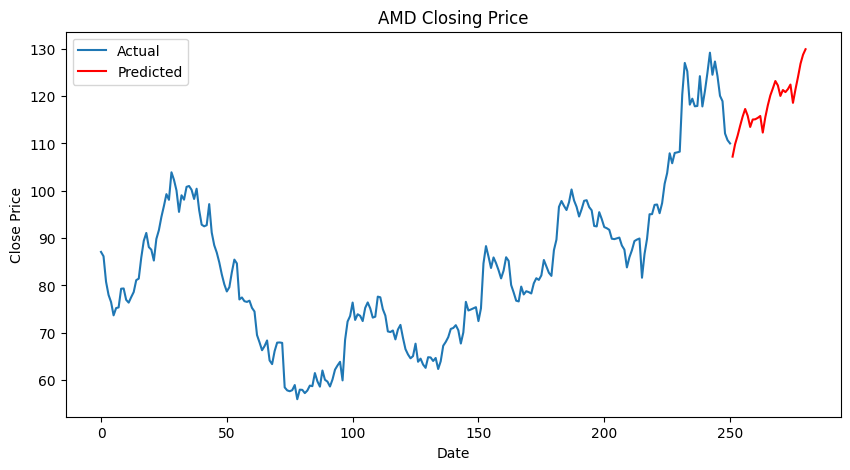

In [ ]:


# plot the predictions
plt.figure(figsize=(10, 5))

plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color="red", label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{ticker} Stock Price')
plt.legend(loc='upper left')

plt.show()